In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset

df = pd.read_csv('/content/dsa_job - data_science_job.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [5]:
df.shape

(5000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [8]:
# missing value
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [9]:
#handling missing values
# imputing
df['job_category'].fillna(df['job_category'].mode()[0],inplace=True)
df['salary_currency'].fillna(df['salary_currency'].mode()[0],inplace=True)
df['experience_level'].fillna(df['experience_level'].mode()[0],inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0],inplace=True)
df['salary_in_usd'].fillna(df['salary_in_usd'].median(),inplace=True)


df.isnull().sum()



<ipython-input-9-a6bc79862c5e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_category'].fillna(df['job_category'].mode()[0],inplace=True)
<ipython-input-9-a6bc79862c5e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [10]:
# converting datatype " work_year"
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           5000 non-null   datetime64[ns]
 1   job_title           5000 non-null   object        
 2   job_category        5000 non-null   object        
 3   salary_currency     5000 non-null   object        
 4   salary              5000 non-null   int64         
 5   salary_in_usd       5000 non-null   int64         
 6   employee_residence  5000 non-null   object        
 7   experience_level    5000 non-null   object        
 8   employment_type     5000 non-null   object        
 9   work_setting        5000 non-null   object        
 10  company_location    5000 non-null   object        
 11  company_size        5000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 468.9+ KB


In [11]:
# Standardizing categorical values
df['employment_type'] = df['employment_type'].str.lower().str.strip()  # Convert to lower case and strip whitespace

# Correcting specific known inconsistencies
df['experience_level'] = df['experience_level'].replace({'junior': 'entry-level', 'senior': 'senior-level'})



In [12]:
#convert  categorical variables

categorical_cols = ['job_category', 'salary_currency', 'experience_level', 'company_size']
for col in categorical_cols:
    df[col] = pd.Categorical(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           5000 non-null   datetime64[ns]
 1   job_title           5000 non-null   object        
 2   job_category        5000 non-null   category      
 3   salary_currency     5000 non-null   category      
 4   salary              5000 non-null   int64         
 5   salary_in_usd       5000 non-null   int64         
 6   employee_residence  5000 non-null   object        
 7   experience_level    5000 non-null   category      
 8   employment_type     5000 non-null   object        
 9   work_setting        5000 non-null   object        
 10  company_location    5000 non-null   object        
 11  company_size        5000 non-null   category      
dtypes: category(4), datetime64[ns](1), int64(2), object(5)
memory usage: 332.9+ KB


In [13]:
# Standardize categorical values
for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()

In [14]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [15]:
#value count of salary currency
df['salary_currency'].value_counts()

,count
salary_currency,
eur,1462
inr,916
jpy,891
us dolars,875
gbp,856


In [23]:
#- Ensure all salary values are in USD for consistency in analysis
#currency conversion rates to USD
conversion_rates = {
    'usd': 1,
    'eur': 1.1,  # Example: 1 EUR = 1.1 USD
    'gbp': 1.3,  # Example: 1 GBP = 1.3 USD
    'inr': 0.013,  # Example: 1 INR = 0.013 USD
    'jpy': 0.007,  # Example: 1 JPY = 0.007 USD
}

# Function to convert salary to USD
def convert_to_usd(row):
    currency = row['salary_currency']
    if currency in conversion_rates:
        return row['salary'] * conversion_rates[currency]
    else:
        return row['salary']  # If currency is USD, no conversion needed

# Apply conversion
df['salary_in_usd'] = df.apply(convert_to_usd, axis=1)

In [22]:
#binning
# Binning salary_in_usd
# Define the bins and labels
salary_bins = [0, 30000, 60000, 90000, 120000, float('inf')]
salary_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']

# Create a new column for binned salary
df['salary_bin'] = pd.cut(df['salary_in_usd'], bins=salary_bins, labels=salary_labels, right=False)

#  Binning work_year
# Example: Convert to years since 2000
df['work_year_numeric'] = df['work_year'].dt.year - 2000

# Define the bins and labels for work_year using the numeric representation
work_year_bins = [0, 2, 5, 10, 20, float('inf')]
work_year_labels = ['0-2 years', '2-5 years', '5-10 years', '10-20 years', '20+ years']

# Create a new column for binned work_year using the numeric representation
df['work_year_bin'] = pd.cut(df['work_year_numeric'], bins=work_year_bins, labels=work_year_labels, right=False, include_lowest=True, duplicates='drop')

# Check the DataFrame to see the new binned columns
print(df[['salary_in_usd', 'salary_bin', 'work_year', 'work_year_bin']].head())



   salary_in_usd salary_bin  work_year work_year_bin
0      205256.70      120k+ 2022-01-01     20+ years
1         774.41       <30k 2020-01-01     20+ years
2         796.64       <30k 2022-01-01     20+ years
3        1078.91       <30k 2022-01-01     20+ years
4      189543.20      120k+ 2020-01-01     20+ years


In [24]:
df.dtypes

,0
work_year,datetime64[ns]
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,float64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


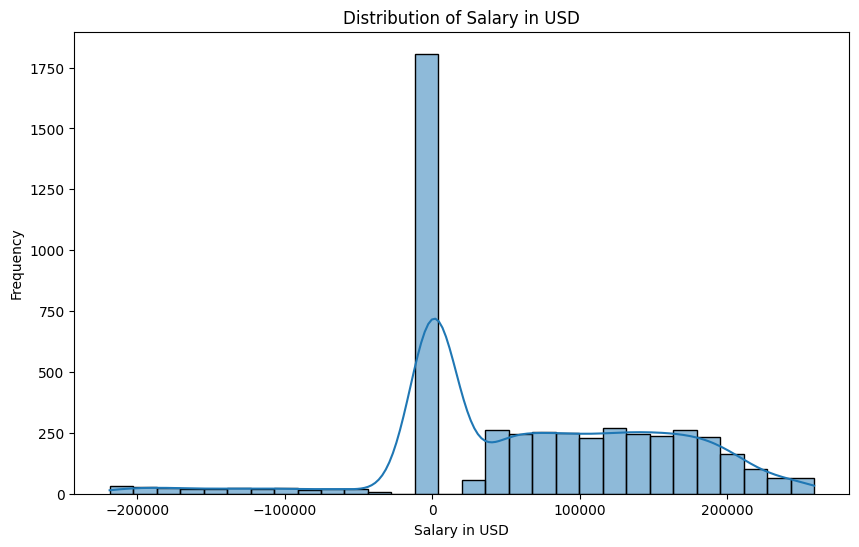

In [25]:
#data visualization
# distribution of salary in usd


plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()



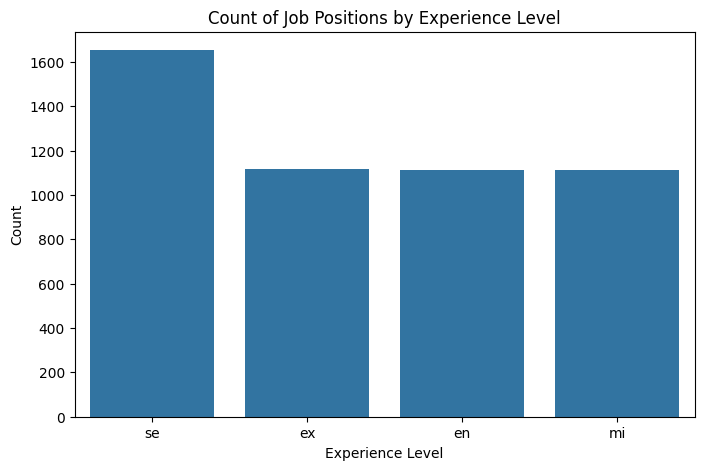

In [26]:
#count plot of experience level

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)
plt.title('Count of Job Positions by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

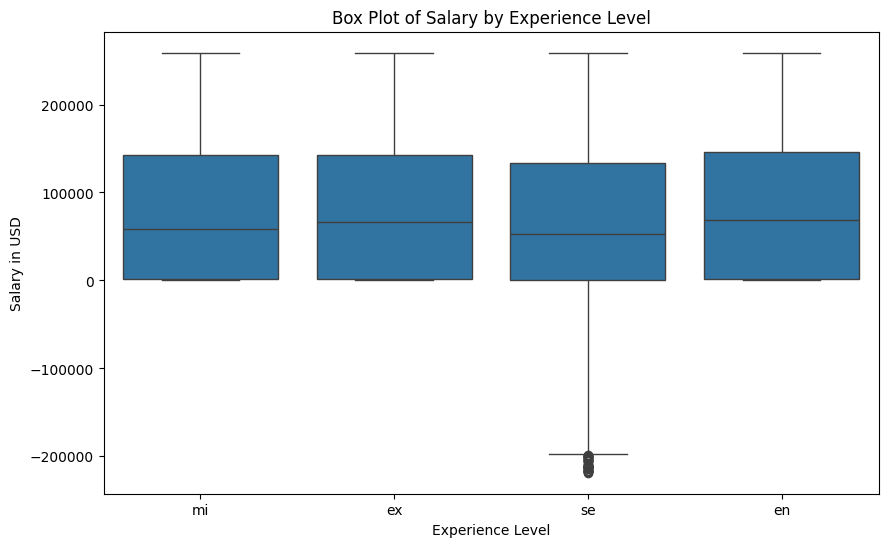

In [27]:
# Box Plot of Salary by Experience Level

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Box Plot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

In [30]:
# detecting outliers

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outliers_dict = {}

    for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Only numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers

        print(f"\nOutliers in column '{column}':")
        print(outliers)

    return outliers_dict

# Call the function to detect outliers
outliers = detect_outliers_iqr(df)


Outliers in column 'salary':
      work_year                             job_title  job_category  \
23   2021-01-01                          Statistician  data science   
29   2022-01-01                         Data Engineer  data science   
33   2021-01-01             Machine Learning Engineer  data science   
65   2021-01-01             Data Scientist  in office  data science   
79   2021-01-01  Machine Learning Engineer  in office  data science   
...         ...                                   ...           ...   
4842 2022-01-01                Statistician  (Remote)  data science   
4863 2020-01-01               Data Engineer  (Remote)  data science   
4866 2020-01-01  Machine Learning Engineer  in office  data science   
4878 2022-01-01              Data Scientist  (Remote)  data science   
4966 2022-01-01                          Statistician  data science   

     salary_currency  salary  salary_in_usd employee_residence  \
23               eur -112757      -124032.7        

In [31]:
# handling outliers
# by capping outliers

def cap_outliers_iqr(df):
    df_capped = df.copy()

    for column in df_capped.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

# Call the function to cap outliers
df_capped = cap_outliers_iqr(df)
print(f"DataFrame shape after capping outliers: {df_capped.shape}")


DataFrame shape after capping outliers: (5000, 15)


In [ ]:
#by removing outliers ..>>>> for performance evaluation
# def remove_outliers_iqr(df):
#     df_cleaned = df.copy()

#     for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
#         Q1 = df_cleaned[column].quantile(0.25)
#         Q3 = df_cleaned[column].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the bounds for outliers
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Remove outliers
#         df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

#     return df_cleaned

# # Call the function to remove outliers
# df_no_outliers = remove_outliers_iqr(df)
# print(f"Original DataFrame shape: {df.shape}")
# print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

In [34]:
df.dtypes

,0
work_year,datetime64[ns]
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,float64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


In [36]:
# encoding
#LABEL encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_cols = [
    'job_title',
    'job_category',
    'salary_currency',
    'employee_residence',
    'experience_level',
    'employment_type',
    'work_setting',
    'company_location',
    'company_size'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_bin,work_year_numeric,work_year_bin
0,2022-01-01,11,0,0,186597,205256.70,6,2,0,2,1,0,120k+,22,20+ years
1,2020-01-01,13,3,3,110630,774.41,3,1,1,2,2,1,<30k,20,20+ years
2,2022-01-01,9,3,2,61280,796.64,5,2,0,0,0,0,<30k,22,20+ years
3,2022-01-01,2,3,3,154130,1078.91,1,3,2,0,4,0,<30k,22,20+ years
4,2020-01-01,12,1,0,172312,189543.20,5,2,2,1,5,2,120k+,20,20+ years


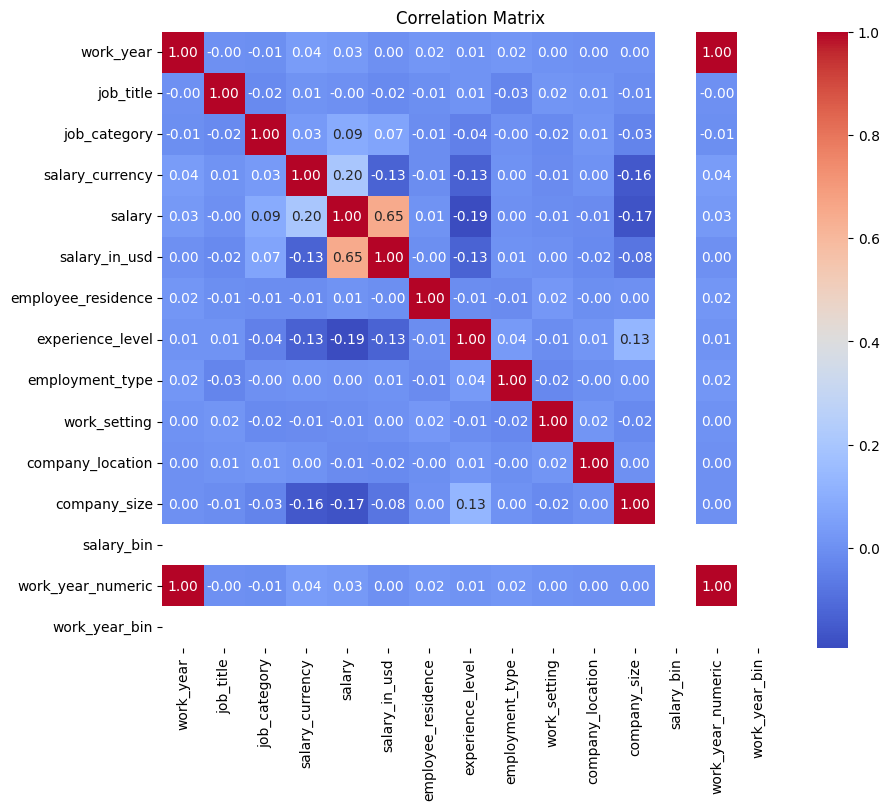

In [40]:
# EXPLORATORY DATA ANALYSIS
#correlation matrix
# Convert columns to numeric, errors='coerce' will replace invalid values with NaN
numeric_df = df.apply(pd.to_numeric, errors='coerce')


correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

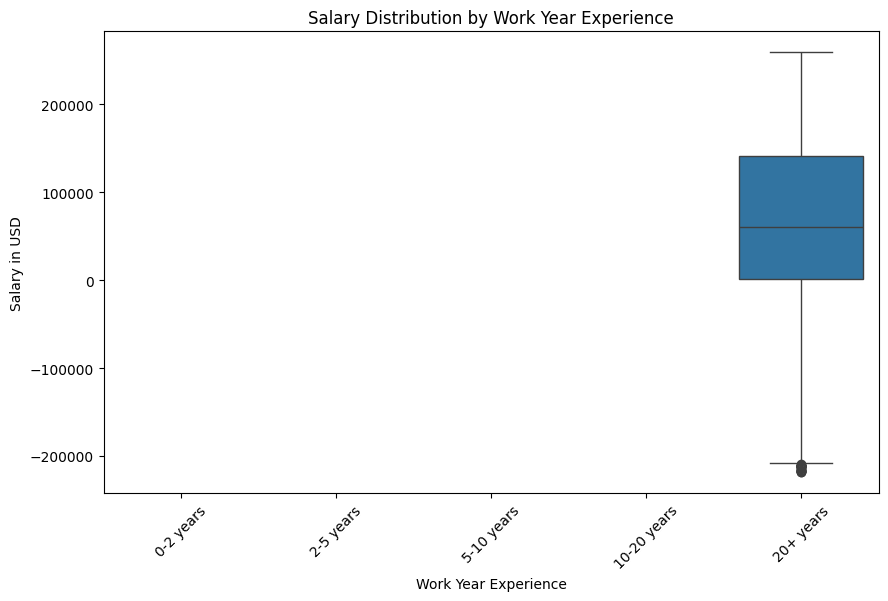

In [41]:

#Salary vs. Work Year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_year_bin', y='salary_in_usd')
plt.title('Salary Distribution by Work Year Experience')
plt.xlabel('Work Year Experience')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


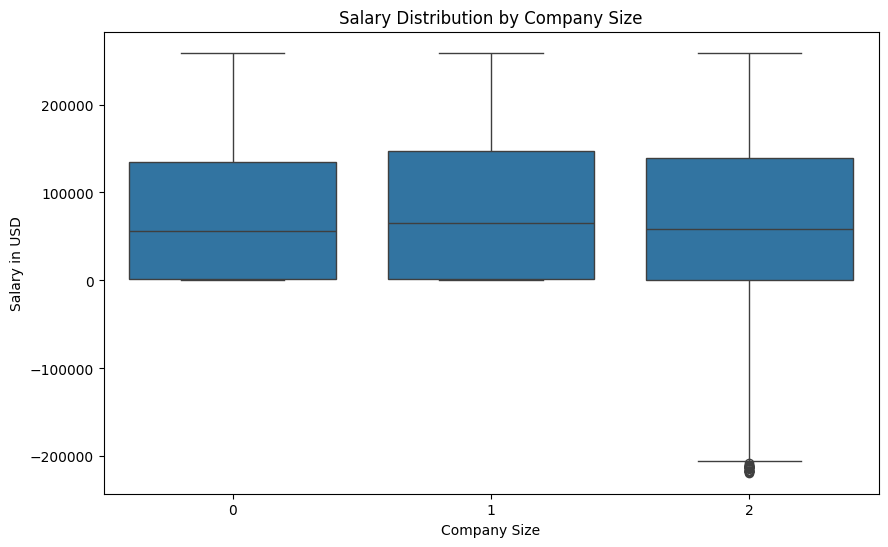

In [42]:
# Salary Distribution by Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()


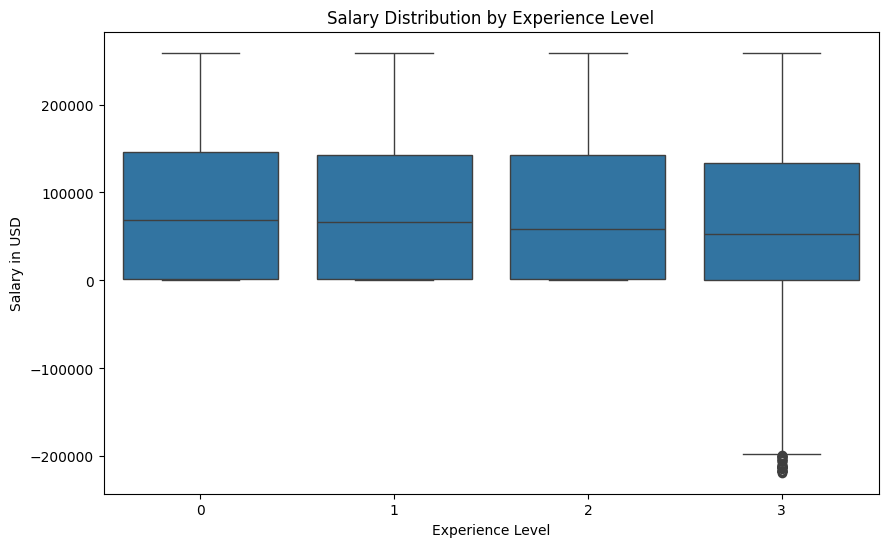

In [46]:
# Group Comparisons

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

# # documentation
# The data cleaning and EDA phases provided critical insights into the dataset, revealing trends and relationships that are essential for informed decision-making. However, challenges such as handling missing data, managing outliers, and ensuring appropriate feature encoding required careful consideration. Addressing these challenges is crucial for building a robust classification model and deriving actionable insights from the data. Future work will focus on refining these processes and exploring advanced modeling techniques to enhance predictive performance.